In [34]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diseasecotton/data/val/fresh cotton plant/dsd (257)_iaip.jpg
/kaggle/input/diseasecotton/data/val/fresh cotton plant/dsd (275)_iaip.jpg
/kaggle/input/diseasecotton/data/val/fresh cotton plant/dsd (396)_iaip.jpg
/kaggle/input/diseasecotton/data/val/fresh cotton plant/dsd (313)_iaip.jpg
/kaggle/input/diseasecotton/data/val/fresh cotton plant/dsd (168)_iaip.jpg
/kaggle/input/diseasecotton/data/val/fresh cotton plant/dsd (386)_iaip.jpg
/kaggle/input/diseasecotton/data/val/fresh cotton plant/dsd (543)_iaip.jpg
/kaggle/input/diseasecotton/data/val/fresh cotton plant/dsd (152)_iaip.jpg
/kaggle/input/diseasecotton/data/val/fresh cotton plant/dsd (200)_iaip.jpg
/kaggle/input/diseasecotton/data/val/fresh cotton plant/dsd (204)_iaip.jpg
/kaggle/input/diseasecotton/data/val/fresh cotton plant/dsd (142)_iaip.jpg
/kaggle/input/diseasecotton/data/val/fresh cotton plant/dsd (593)_iaip.jpg
/kaggle/input/diseasecotton/data/val/fresh cotton plant/dsd (141)_iaip.jpg
/kaggle/input/diseasecott

/kaggle/input/diseasecotton/data/train/diseased cotton plant/dd (355)_iaip.jpg
/kaggle/input/diseasecotton/data/train/diseased cotton plant/dd (467)_iaip.jpg
/kaggle/input/diseasecotton/data/train/diseased cotton plant/dd (64)_iaip.jpg
/kaggle/input/diseasecotton/data/train/diseased cotton plant/dd (425)_iaip.jpg
/kaggle/input/diseasecotton/data/train/diseased cotton plant/dd (777)_iaip.jpg
/kaggle/input/diseasecotton/data/train/diseased cotton plant/dd (404)_iaip.jpg
/kaggle/input/diseasecotton/data/train/diseased cotton plant/dd (174)_iaip(1).jpg
/kaggle/input/diseasecotton/data/train/diseased cotton plant/dd (385)_iaip.jpg
/kaggle/input/diseasecotton/data/train/diseased cotton plant/dd (287)_iaip.jpg
/kaggle/input/diseasecotton/data/train/diseased cotton plant/dd (277)_iaip.jpg
/kaggle/input/diseasecotton/data/train/diseased cotton plant/dd (685)_iaip.jpg
/kaggle/input/diseasecotton/data/train/diseased cotton plant/dd (511)_iaip.jpg
/kaggle/input/diseasecotton/data/train/diseased co

In [33]:
import tensorflow as tf
if tf.test.gpu_device_name():
    print('the gpu available {}'.format(tf.test.gpu_device_name()))
else:
    print('no gpu')

the gpu available /device:GPU:0


In [35]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.9
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)


/opt/conda/lib/python3.7/site-packages/tensorflow/python/client/session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [36]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [37]:
tf.__version__

'2.4.1'

In [38]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import ResNet50
# from tensorflow.keras.applications.InceptionV3 import InceptionV3
from keras import applications

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [39]:
IMAGE_SIZE_VGG16 = [224, 224]
# IMAGE_SIZE_VGG16 = [299, 299]


train_path = '/kaggle/input/diseasecotton/data/train'
test_path = '/kaggle/input/diseasecotton/data/test'
valid_path = '/kaggle/input/diseasecotton/data/val'

In [42]:
vgg16 = VGG16(input_shape=IMAGE_SIZE_VGG16+[3], weights = 'imagenet', include_top = False)
# applications.InceptionV3

58892288/58889256 [==============================] - 1s 0us/step


In [43]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [44]:
for layer in vgg16.layers:
    layer.trainable = False



In [45]:
folders = glob('/kaggle/input/diseasecotton/data/train/*')
folders

['/kaggle/input/diseasecotton/data/train/fresh cotton plant',
 '/kaggle/input/diseasecotton/data/train/fresh cotton leaf',
 '/kaggle/input/diseasecotton/data/train/diseased cotton plant',
 '/kaggle/input/diseasecotton/data/train/diseased cotton leaf']

In [46]:
x = Flatten()(vgg16.output)


In [47]:
prediction = Dense(len(folders), activation = 'softmax')(x)


model_vgg16 = Model(inputs=vgg16.input, outputs=prediction)


In [48]:
model_vgg16.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [49]:
model_vgg16.compile(loss= 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [50]:
train_datagen = ImageDataGenerator(rescale= 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)


test_datagen = ImageDataGenerator(rescale = 1./255)

valid_datagen = ImageDataGenerator(rescale= 1./255)

In [55]:
training_set = train_datagen.flow_from_directory('/kaggle/input/diseasecotton/data/train',
                                                target_size = (224, 224),
                                                batch_size= 32,
                                                class_mode = 'categorical')

# training_set = train_datagen.flow_from_directory('/kaggle/input/diseasecotton/data/train',
#                                                 target_size = (299, 299),
#                                                 batch_size= 32,
#                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [56]:
test_set = test_datagen.flow_from_directory('/kaggle/input/diseasecotton/data/test',
                                                target_size = (224, 224),
                                                batch_size= 32,
                                                class_mode = 'categorical')

# test_set = test_datagen.flow_from_directory('/kaggle/input/diseasecotton/data/test',
#                                                 target_size = (299, 299),
#                                                 batch_size= 32,
#                                                 class_mode = 'categorical')

Found 36 images belonging to 5 classes.


In [57]:
valid_set = valid_datagen.flow_from_directory('/kaggle/input/diseasecotton/data/val',
                                                target_size = (224, 224),
                                                batch_size= 32,
                                                class_mode = 'categorical')

# valid_set = valid_datagen.flow_from_directory('/kaggle/input/diseasecotton/data/val',
#                                                 target_size = (299, 299),
#                                                 batch_size= 32,
#                                                 class_mode = 'categorical')

Found 324 images belonging to 4 classes.


In [58]:
r = model_vgg16.fit_generator(
training_set, validation_data = valid_set,
epochs = 35,
steps_per_epoch = len(training_set),
validation_steps = len(valid_set))

Epoch 1/35
61/61 [==============================] - 43s 695ms/step - loss: 0.6852 - accuracy: 0.7376 - val_loss: 0.2707 - val_accuracy: 0.8796
Epoch 2/35
61/61 [==============================] - 38s 622ms/step - loss: 0.2583 - accuracy: 0.9062 - val_loss: 0.1703 - val_accuracy: 0.9383
Epoch 3/35
61/61 [==============================] - 37s 610ms/step - loss: 0.1684 - accuracy: 0.9441 - val_loss: 0.1817 - val_accuracy: 0.9290
Epoch 4/35
61/61 [==============================] - 38s 624ms/step - loss: 0.1458 - accuracy: 0.9482 - val_loss: 0.1358 - val_accuracy: 0.9506
Epoch 5/35
61/61 [==============================] - 38s 619ms/step - loss: 0.1105 - accuracy: 0.9677 - val_loss: 0.1237 - val_accuracy: 0.9475
Epoch 6/35
61/61 [==============================] - 39s 640ms/step - loss: 0.0962 - accuracy: 0.9662 - val_loss: 0.1110 - val_accuracy: 0.9537
Epoch 7/35
61/61 [==============================] - 40s 658ms/step - loss: 0.0919 - accuracy: 0.9687 - val_loss: 0.1079 - val_accuracy: 0.9630

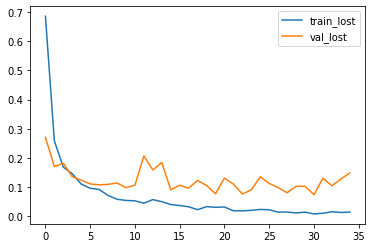

In [59]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'train_lost')
plt.plot(r.history['val_loss'], label = 'val_lost')
plt.legend()
plt.show()


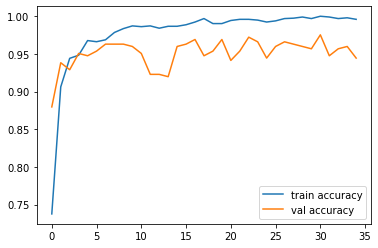

In [60]:
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label = 'train accuracy')
plt.plot(r.history['val_accuracy'], label = 'val accuracy')
plt.legend()
plt.show()


In [61]:
model_vgg16.save('model_VGG16.h5')

In [62]:
y_pred = model_vgg16.predict(valid_set)

In [63]:
y_pred

array([[4.87962701e-08, 9.99993682e-01, 2.67513620e-08, 6.31742978e-06],
       [9.99991179e-01, 1.82458515e-09, 8.83318717e-06, 3.03598853e-08],
       [2.14146030e-06, 9.95697021e-01, 1.08961365e-04, 4.19185450e-03],
       ...,
       [3.35677387e-03, 4.94660962e-05, 9.96593177e-01, 5.44122884e-07],
       [1.20515767e-06, 9.99955535e-01, 1.17323449e-08, 4.33019741e-05],
       [9.94769037e-01, 3.72965267e-04, 4.85730078e-03, 6.70988925e-07]],
      dtype=float32)

In [64]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([1, 0, 1, 0, 0, 0, 1, 3, 1, 2, 1, 3, 2, 2, 0, 3, 1, 2, 3, 0, 0, 0,
       1, 2, 2, 2, 2, 1, 2, 2, 3, 3, 1, 1, 1, 0, 3, 3, 3, 1, 2, 2, 3, 2,
       3, 3, 1, 1, 1, 0, 3, 1, 3, 3, 3, 1, 1, 3, 1, 1, 2, 2, 3, 2, 3, 2,
       3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 2, 2, 3, 2, 3, 1, 3, 2, 1, 2, 1, 1,
       3, 2, 0, 2, 1, 3, 3, 3, 0, 0, 0, 2, 3, 3, 3, 1, 2, 3, 1, 3, 2, 1,
       0, 2, 0, 0, 3, 1, 2, 1, 2, 3, 3, 1, 2, 3, 1, 2, 1, 2, 1, 2, 1, 1,
       1, 1, 3, 1, 3, 1, 1, 0, 3, 2, 3, 0, 1, 2, 3, 2, 1, 2, 0, 1, 3, 2,
       3, 1, 3, 1, 3, 3, 1, 1, 1, 0, 1, 1, 0, 0, 2, 3, 3, 3, 0, 1, 1, 0,
       3, 3, 0, 3, 3, 1, 0, 2, 1, 1, 2, 2, 2, 2, 3, 3, 2, 3, 1, 3, 1, 2,
       1, 3, 3, 2, 0, 1, 0, 2, 3, 0, 3, 2, 3, 2, 0, 1, 0, 3, 3, 3, 2, 2,
       0, 1, 1, 3, 2, 2, 3, 1, 2, 2, 0, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 0,
       3, 1, 2, 2, 0, 1, 0, 3, 3, 3, 2, 1, 1, 3, 2, 3, 2, 0, 3, 0, 3, 0,
       2, 2, 1, 2, 3, 3, 1, 1, 3, 2, 1, 3, 0, 3, 1, 3, 1, 2, 0, 3, 3, 2,
       1, 1, 2, 3, 3, 0, 3, 2, 0, 3, 0, 3, 3, 2, 2,

In [1]:
# /kaggle/input/diseasecotton/data/test/diseased cotton plant/dd (706).jpg
# /kaggle/input/diseasecotton/data/test/diseased cotton leaf/dis_leaf (248).jpg
# /kaggle/input/diseasecotton/data/test/diseased cotton leaf/dis_leaf (124).jpg
# /kaggle/input/diseasecotton/data/test/diseased cotton leaf/dis_leaf (322).jpg
# /kaggle/input/diseasecotton/data/test/test data comp files/dsd (600)_compressed.jpg
# /kaggle/input/diseasecotton/data/test/test data comp files/dis_leaf (124)_compressed.jpg
# /kaggle/input/diseasecotton/data/test/test data comp files/dis_leaf (248)_compressed.jpg
# /kaggle/input/diseasecotton/data/test/test data comp files/dsd (223)_compressed.jpg
# /kaggle/input/diseasecotton/data/test/test data comp files/dd (367)_compressed.jpg
# /kaggle/input/diseasecotton/data/test/test data comp files/dd (328)_compressed.jpg
# /kaggle/input/diseasecotton/data/test/test data comp files/dis_leaf (322)_compressed.jpg
# /kaggle/input/diseasecotton/data/test/test data comp files/dsd (228)_compressed.jpg
# /kaggle/input/diseasecotton/data/test/test data comp files/d (341)_compressed.jpg
# /kaggle/input/diseasecotton/data/test/test data comp files/d (384)_compressed.jpg
# /kaggle/input/diseasecotton/data/test/test data comp files/d (366)_compressed.jpg
# /kaggle/input/diseasecotton/data/test/test data comp files/dd (513)_compressed.jpg
# /kaggle/input/diseasecotton/data/test/test data comp files/dsd (632)_compressed.jpg
# /kaggle/input/diseasecotton/data/test/test data comp files/dd (41)_compressed.jpg
# /kaggle/input/diseasecotton/data/test/test data comp files/dd (706)_compressed.jpg
# /kaggle/input/diseasecotton/data/test/test data comp files/dsd (405)_compressed.jpg
# /kaggle/input/diseasecotton/data/test/test data comp files/d (378)_compressed.jpg
# /kaggle/input/diseasecotton/data/test/test data comp files/d (396)_compressed.jpg
test = load_img('/kaggle/input/diseasecotton/data/test/test data comp files/dsd (632)_compressed.jpg', target_size = (224,224))

test_img = image.img_to_array(test)
test_img = test_img / 255
test_img = np.expand_dims(test_img, axis=0)
result = model_vgg16.predict(test_img)

a = np.argmax(model_vgg16.predict(test_img), axis=1)

if a == 0:
    print('diseased cotton leaf')
elif a == 1:
    print('diseased cotton plant')
elif a == 2:
    print('fresh cotton leaf')
else:
    print('fresh cotton plant')

NameError: name 'load_img' is not defined